# How to download images to Google Drive for a permanent dataset.
This notebook is based on challenge 1. It allows you to download a bunch of images found on Google Image Search to your Google Drive. This is nice already, but it also means that you can easily download these images to your own PC from Google Drive 

In [1]:
# Import the necesseties
from fastai import *
from fastai.vision import *
import PIL

!pip install google_images_download
from google_images_download import google_images_download

from google.colab import drive

    100% |████████████████████████████████| 911kB 7.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [2]:
# Mount Google Drive for access
## Click the link → Select ‘Allow’ → Copy Authorization code → Paste into Enter Authorization text box → press Enter
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Change PATH everytime you will download new images, otherwise two datasets will be mixed up.
## For example, change test_dataset_1 to test_dataset_2. This will create a new folder in your Drive called 'test_dataset_2'
### Moreover, you can also extend the path to folders you have in your Drive. For example: 
#### PATH = "/content/drive/My Drive/My Existing Folder/test_dataset_1/"
PATH = "/content/drive/My Drive/test_dataset_1/"

In [7]:
response = google_images_download.googleimagesdownload() # Initialise

arguments = {"keywords" : "Bulbasaur,Squirtle,Charmander", # Terms to search for (not perfect, just an example)
             "limit" : 50, # Number of pictures to download per term
             "print_urls" : False,
             "output_directory" : f'{PATH}', # Save to the path as specified above, in this case: Google Drive
             "chromedriver":"/usr/bin/chromedriver"}

paths = response.download(arguments) # Download the pictures give the arguments above


Item no.: 1 --> Item name = Bulbasaur
Evaluating...
Starting Download...
Completed Image ====> 1. 250px-001bulbasaur.png
Completed Image ====> 2. jppl_bulbasaur_crossbody.jpg
Completed Image ====> 3. 1-bulbasaur.png
Completed Image ====> 4. 1130-00021_pokemon_bulbasaur_evolution_realbig_collection_6628.jpg
Completed Image ====> 5. 25448_25681_25626_25574x.jpg
Completed Image ====> 6. pokemon-lets-go-how-to-get-bulbasaur.jpg
Completed Image ====> 7. bulbasaur-facts.jpg
Completed Image ====> 8. bulbasaur.jpg
Completed Image ====> 9. 405069_1.jpg
Completed Image ====> 10. bulbasaur_single_front_692865bf-7cca-421e-b136-a5fbb3b7d0df.png
Completed Image ====> 11. 61a371a7768ed6e7e2e9e19a3307101e378e2719_hq.jpg
Completed Image ====> 12. pokemon-bulbasaur-3d-model-max-obj-mtl-mat.jpg
Completed Image ====> 13. 91lt41dfmbl._sx425_.jpg
Completed Image ====> 14. 1123924.jpg
Completed Image ====> 15. dw7yf90xgaarcb3.jpg
Completed Image ====> 16. fc4e5b22a090afa2f3a0951d2fdb3604.jpg
Completed Image

In [0]:
#data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=224)
#data.normalize(imagenet_stats)
np.random.seed(42)
data = ImageDataBunch.from_folder(PATH, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

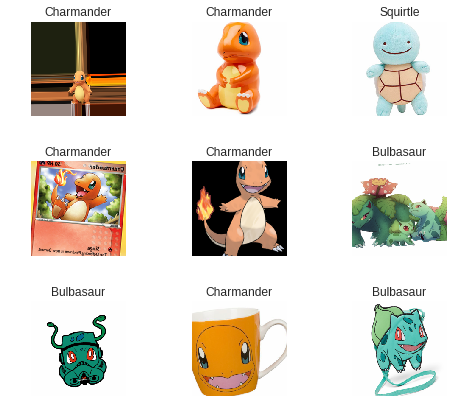

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bulbasaur', 'Charmander', 'Squirtle'], 3, 119, 29)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [16]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,0.228423,0.555123,0.241379
2,0.162558,0.549177,0.206897
3,0.164182,0.540215,0.137931
4,0.169634,0.540248,0.137931
5,0.163451,0.540681,0.137931
6,0.148880,0.551238,0.137931
7,0.148175,0.554333,0.137931
8,0.146225,0.560352,0.137931
9,0.139212,0.563481,0.137931
10,0.126931,0.561253,0.137931


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

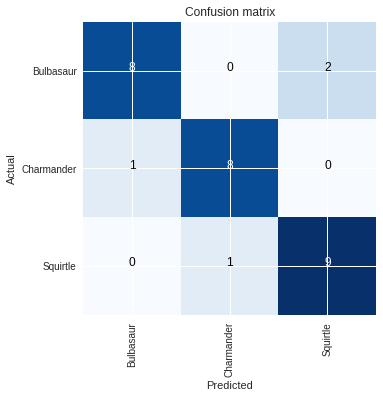

In [20]:
interp.plot_confusion_matrix()

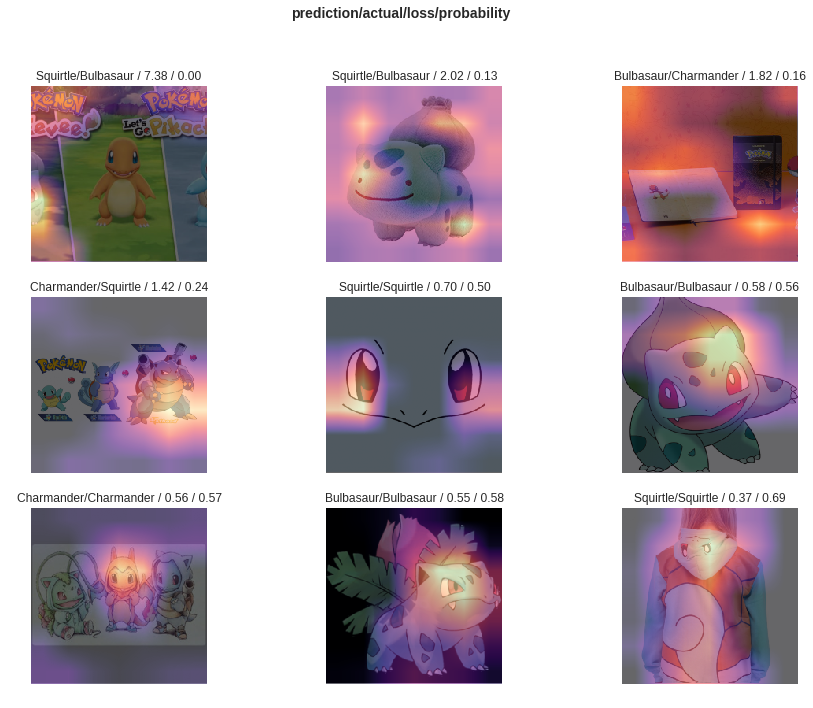

In [21]:
interp.plot_top_losses(9, figsize=(15,11))